In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import utils.dataset as ds
from utils.train import model_setting
from utils.model import UNetplusplus
from torch.utils.data import DataLoader
from torchvision.transforms import v2 as transforms
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = UNetplusplus(1,3)
image_dataset = ds.image_data('../data/image_data/')
train_model = model_setting(model,image_dataset,10,2,1e-4,1e-2)
train_model.dataset_split([0.8,0.1,0.1])

In [6]:
trans = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAdjustSharpness(0.5,0.5),
    transforms.ScaleJitter((512,512),(0.5,1.5)),
    transforms.ToPILImage(),
    transforms.GaussianBlur((5,9),sigma=(0.1,2.0)),
])
ori_imagedata = ds.image_data('../data/image_data/',original=True)
for i in range(len(ori_imagedata)):
    for j in range(30):
        image1,image2 = trans(ori_imagedata._get_image(i,'RGB','RGB'))
        image1 = transforms.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5, saturation=0.5)(image1)
        image1.save(f'../data/image_data/Images/image_{i}_{j}.jpg')
        image2.save(f'../data/image_data/Masks/mask_{i}_{j}.jpg')

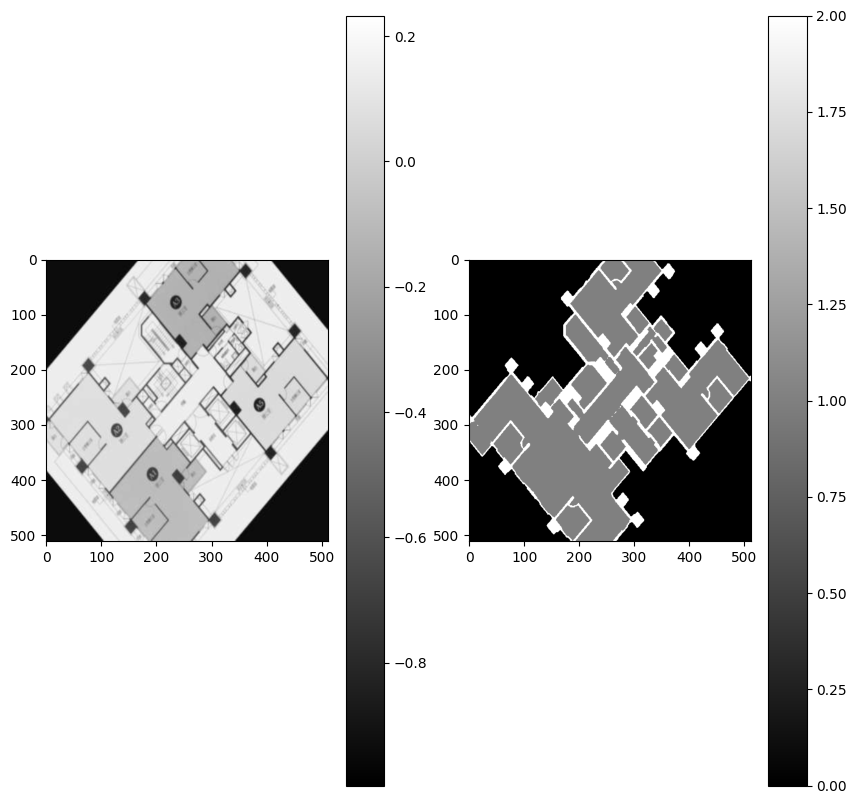

In [79]:
num = np.random.randint(0,len(image_dataset))
fig,ax = plt.subplots(1,2,figsize=(10,10))
im1 = ax[0].imshow(image_dataset[num][0].numpy().squeeze(),cmap='gray')
im2 = ax[1].imshow(image_dataset[num][1].numpy().squeeze(),cmap='gray')
fig.colorbar(im1,ax=ax[0],)
fig.colorbar(im2,ax=ax[1])